In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
m_cols=['v1','v2']
data=pd.read_csv("C://Users/Rajnish/Downloads/archive (20)/spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data=data.rename(columns={'v1':'target','v2':'sms'})

In [6]:
data.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
data['lenght']=data['sms'].str.len()

In [9]:
data.head()

,target,sms,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
y=pd.get_dummies(data['target'], drop_first = True)
data=pd.concat([data,y],axis=1)
data.drop("target",axis=1,inplace=True)

In [11]:
def meassage_lenght(msg):
    msg_word=msg.split(" ")
    len_msg=len(msg_word)
    return len_msg

In [12]:
data['word_count']=data['sms'].apply(meassage_lenght)

In [13]:
data.head()

,sms,lenght,spam,word_count
0,"Go until jurong point, crazy.. Available only ...",111,0,20
1,Ok lar... Joking wif u oni...,29,0,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28
3,U dun say so early hor... U c already then say...,49,0,11
4,"Nah I don't think he goes to usf, he lives aro...",61,0,13


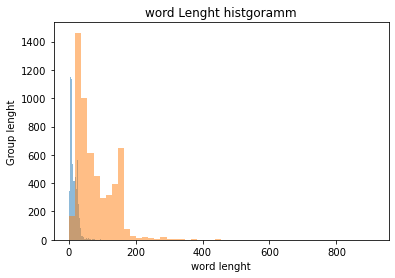

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['word_count'],bins=50,alpha=0.5)
plt.hist(data['lenght'],bins=50,alpha=0.5)
plt.xlabel("word lenght")
plt.ylabel("Group lenght")
plt.title("word Lenght histgoramm");

In [15]:
data1=data[(data['word_count']>80) & (data['lenght']>100)]

In [16]:
data1

,sms,lenght,spam,word_count
1084,For me the love should start with attraction.i...,910,0,171
1512,"Hey sweet, I was wondering when you had a mome...",458,0,95
1578,How to Make a girl Happy? It's not at all diff...,611,0,121
1862,The last thing i ever wanted to do was hurt yo...,790,0,162
2009,I can't keep going through this. It was never ...,431,0,89
2157,Sad story of a Man - Last week was my b'day. M...,588,0,125
2369,A Boy loved a gal. He propsd bt she didnt mind...,450,0,96
2379,"Good evening Sir, hope you are having a nice d...",482,0,99
2433,Indians r poor but India is not a poor country...,632,0,119
2847,Sad story of a Man - Last week was my b'day. M...,588,0,125


In [17]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_pun(msg):
    new_text="".join([char for char in msg if char not in string.punctuation])
    return new_text

In [19]:
data['new_sms']=data['sms'].apply(remove_pun)

In [20]:
data.head()

,sms,lenght,spam,word_count,new_sms
0,"Go until jurong point, crazy.. Available only ...",111,0,20,Go until jurong point crazy Available only in ...
1,Ok lar... Joking wif u oni...,29,0,6,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,49,0,11,U dun say so early hor U c already then say
4,"Nah I don't think he goes to usf, he lives aro...",61,0,13,Nah I dont think he goes to usf he lives aroun...


In [21]:
import re
def tockenize(text):
    tolens=re.split('\W',text)
    return tolens

In [22]:
data['tokenized_row']=data['new_sms'].apply(lambda row:tockenize(row.lower()))

In [23]:
data.head()

,sms,lenght,spam,word_count,new_sms,tokenized_row
0,"Go until jurong point, crazy.. Available only ...",111,0,20,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,Ok lar... Joking wif u oni...,29,0,6,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,U dun say so early hor... U c already then say...,49,0,11,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,"Nah I don't think he goes to usf, he lives aro...",61,0,13,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [24]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
stopwords[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajnish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

In [25]:
def removestopword(text):
    clean_text =[char for char in text if char not in stopwords]
    return clean_text

In [26]:
data['clean_text']=data['tokenized_row'].apply(lambda x:removestopword(x))

In [27]:
data.head()

,sms,lenght,spam,word_count,new_sms,tokenized_row,clean_text
0,"Go until jurong point, crazy.. Available only ...",111,0,20,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,Ok lar... Joking wif u oni...,29,0,6,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,49,0,11,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives aro...",61,0,13,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [28]:
import nltk

from nltk import PorterStemmer
ps=PorterStemmer()
def stemming(tokenized_row):
    stemmed_text=[ps.stem(char) for char in tokenized_row]
    return stemmed_text

In [29]:
data['stemmed_text']=data['clean_text'].apply( lambda x: stemming(x))

In [30]:
data.head()

,sms,lenght,spam,word_count,new_sms,tokenized_row,clean_text,stemmed_text
0,"Go until jurong point, crazy.. Available only ...",111,0,20,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ok lar... Joking wif u oni...,29,0,6,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,49,0,11,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives aro...",61,0,13,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [31]:
data[['sms','stemmed_text']].head()

,sms,stemmed_text
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, live, around, tho..."


In [32]:
def final_text(stemmed_text):
    final_text =' '.join(char for char in stemmed_text)
    return final_text

In [33]:
data['final_text']=data['stemmed_text'].apply(lambda x :final_text(x))

In [34]:
data.head()

,sms,lenght,spam,word_count,new_sms,tokenized_row,clean_text,stemmed_text,final_text
0,"Go until jurong point, crazy.. Available only ...",111,0,20,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,29,0,6,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,49,0,11,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",61,0,13,Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


In [35]:
data=data.drop(['new_sms','tokenized_row','clean_text','stemmed_text','word_count'],axis=1)

In [36]:
data.head()

,sms,lenght,spam,final_text
0,"Go until jurong point, crazy.. Available only ...",111,0,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,29,0,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,49,0,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",61,0,nah dont think goe usf live around though


In [37]:
x=data.drop(['spam'],axis=1)
y=data['spam']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

# Count Vectorization
It involves counting the number of occurrences of each word/token in a given text.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer(max_features=500)
temp_train=cv.fit_transform(x_train['final_text']).toarray()
temp_test=cv.fit_transform(x_test['final_text']).toarray()

In [64]:
tf=TfidfTransformer()
temp_train=tf.fit_transform(temp_train)
temp_test=tf.fit_transform(temp_test)

In [65]:
temp_train=pd.DataFrame(temp_train.toarray(),index=x_train.index)
temp_test=pd.DataFrame(temp_test.toarray(),index=x_test.index)
x_train=pd.concat([x_train,temp_train],axis=1,sort=False)
x_test=pd.concat([x_test,temp_test],axis=1,sort=False)

In [66]:
x_train.head()

,sms,lenght,final_text,0,1,2,3,4,5,6,...,490,491,492,493,494,495,496,497,498,499
5129,"Rose for red,red for blood,blood for heart,hea...",281,rose redr bloodblood heartheart u u send ti ur...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,Hello handsome ! Are you finding that job ? No...,152,hello handsom find job lazi work toward get...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,its cool but tyler had to take off so we're go...,151,cool tyler take gonna buy drop place later ton...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
895,Superb Thought- \Be grateful that u dont have ...,150,superb thought grate u dont everyth u want mea...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4281,U can call now...,17,u call,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
x_train.drop(['sms','final_text'],axis=1,inplace=True)
x_test.drop(['sms','final_text'],axis=1,inplace=True)

In [68]:
x_train.head()

,lenght,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
5129,281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
895,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4281,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Train

## Multinomial Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))

Accuracy_score: 0.8739344997756842


## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy_Score:",accuracy_score(y_test,y_pred))

Accuracy_Score: 0.8003589053387169


## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))

Accuracy_score: 0.9093764019739794


### RandomForest accuracy score =90.91%
### Decision Tree accuracy score =80.04%
###  Multinomial Naive Bayes accuracy score =87.40%